`XGBoost Python Package Introduction`

- author: Rui Zhu
- date: 2025-01-09
- follow: https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [1]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

---
# DMatrix数据框架

In [2]:
# numpy array to DMatrix
data = np.random.rand(5, 10)  # 5 entities, each contains 10 features
label = np.random.randint(2, size=5)  # binary target
dtrain = xgb.DMatrix(data, label=label)

In [3]:
data = pd.DataFrame(np.arange(12).reshape((4,3)), columns=['a', 'b', 'c'])
label = pd.DataFrame(np.random.randint(2, size=4))
dtrain = xgb.DMatrix(data, label=label)

---
# 设置XGBoost参数
- 超参数: https://xgboost.readthedocs.io/en/stable/parameter.html

In [4]:
# 测试数据

data = make_classification(n_samples=1000, n_features=10, random_state=42)
X, y = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [5]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['eval_metric'] = ['auc', 'logloss']

evallist = [(dtrain, 'train'), (dtest, 'eval')]

---
# 训练模型

In [6]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evals=evallist)

[0]	train-auc:0.91838	train-logloss:0.34431	eval-auc:0.87980	eval-logloss:0.40281
[1]	train-auc:0.94474	train-logloss:0.29728	eval-auc:0.91067	eval-logloss:0.37950
[2]	train-auc:0.96051	train-logloss:0.26582	eval-auc:0.92935	eval-logloss:0.35345
[3]	train-auc:0.96535	train-logloss:0.23755	eval-auc:0.93557	eval-logloss:0.32073
[4]	train-auc:0.97244	train-logloss:0.21994	eval-auc:0.93188	eval-logloss:0.32621
[5]	train-auc:0.97715	train-logloss:0.20446	eval-auc:0.94180	eval-logloss:0.30832
[6]	train-auc:0.97976	train-logloss:0.19047	eval-auc:0.94731	eval-logloss:0.28945
[7]	train-auc:0.98212	train-logloss:0.18290	eval-auc:0.94726	eval-logloss:0.28738
[8]	train-auc:0.98318	train-logloss:0.17533	eval-auc:0.94817	eval-logloss:0.28953
[9]	train-auc:0.98437	train-logloss:0.16923	eval-auc:0.94711	eval-logloss:0.29535


In [10]:
bst.save_model('0001.json')  # 保存模型
bst.dump_model('dump.raw.txt')  # 打印模型

In [15]:
new_bst = xgb.Booster(model_file='0001.json')  # 加载模型

---
# 预测

In [17]:
ypred = bst.predict(dtest)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

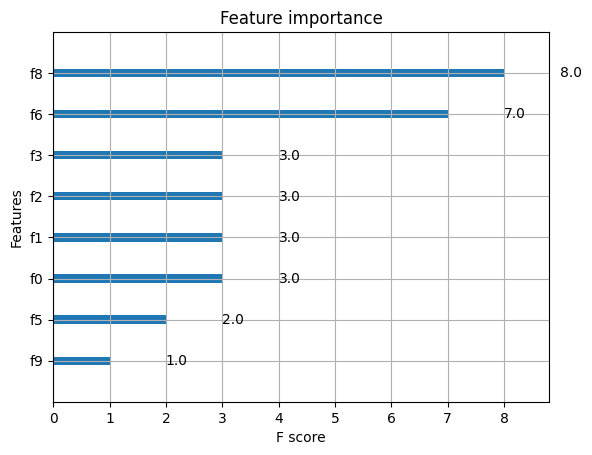

In [18]:
xgb.plot_importance(bst)

<Axes: >

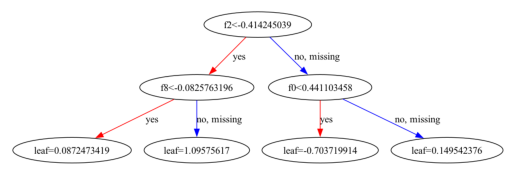

In [19]:
xgb.plot_tree(bst, num_trees=2)

---
# sklearn API

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import xgboost as xgb

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=94)

# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
# Save model into JSON format.
clf.save_model("clf.json")

[0]	validation_0-logloss:0.45997
[1]	validation_0-logloss:0.34184
[2]	validation_0-logloss:0.27076
[3]	validation_0-logloss:0.22399
[4]	validation_0-logloss:0.19346
[5]	validation_0-logloss:0.16814
[6]	validation_0-logloss:0.15393
[7]	validation_0-logloss:0.14081
[8]	validation_0-logloss:0.13269
[9]	validation_0-logloss:0.12515
[10]	validation_0-logloss:0.11551
[11]	validation_0-logloss:0.11184
[12]	validation_0-logloss:0.10799
[13]	validation_0-logloss:0.10541
[14]	validation_0-logloss:0.10493
[15]	validation_0-logloss:0.10326
[16]	validation_0-logloss:0.10300
[17]	validation_0-logloss:0.10339
[18]	validation_0-logloss:0.10160
[19]	validation_0-logloss:0.09892
[20]	validation_0-logloss:0.09478
[21]	validation_0-logloss:0.09359
[22]	validation_0-logloss:0.09247
[23]	validation_0-logloss:0.09284
[24]	validation_0-logloss:0.09266


In [21]:
booster = clf.get_booster()
print(booster.num_boosted_rounds())

25
